In [1]:
#equilibrium.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 21 March 2018.
#compare simulated fixed point to that predicted by BGT, for various ring masses

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [3]:
#restore output
parent_folders = [
    'narrow_ring/ring_mass_1.5e-11/', 'narrow_ring/ring_mass_2.0e-11/', 'narrow_ring/ring_mass_3.7e-11/', 
    'narrow_ring/ring_mass_5.0e-11/', 'narrow_ring/ring_mass_1.0e-10/', 'narrow_ring/ring_mass_2.5e-10/', 
    'narrow_ring/ring_mass_5.0e-10/', 'narrow_ring/ring_mass_1.0e-9/', 'narrow_ring/ring_mass_2.0e-9/', 
    'wide_ring/ring_mass_1.0e-10/', 'wide_ring/ring_mass_2.0e-10/', 'wide_ring/ring_mass_3.3e-10/', 
    'wide_ring/ring_mass_5.0e-10/', 'wide_ring/ring_mass_7.0e-10/', 'wide_ring/ring_mass_1.0e-9/', 
    'wide_ring/ring_mass_1.5e-9/', 'wide_ring/ring_mass_2.0e-9/', 'wide_ring/ring_mass_3.3e-9/', 
    'wide_ring/ring_mass_7.0e-9/', 'wide_ring/ring_mass_8.5e-9/']
data = []
from helper_fns import *
from libration import *
for parent_folder in parent_folders:
    #read simulation output
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    d = {'parent_folder':parent_folder, 'radial_width':radial_width, 'total_ring_mass':total_ring_mass, 
        'Rp':Rp, 'J2':J2} 
    the_output_folder = parent_folder + output_folder
    print 'reading output in folder = ', the_output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    d['ring_width'] = 'narrow'
    if ('wide' in parent_folder):
        d['ring_width'] = 'wide'
    d['a'] = a_mean.mean()
    d['e'] = e_mean.mean()
    d['da'] = da.mean()
    d['de'] = de.mean()
    d['dwt'] = dwt.mean()
    d['q'] = q.mean()
    d['H'] = H.mean()
    d['e_prime'] =  d['de']*d['a']/d['da']
    data += [d]
df = pd.DataFrame(data)

reading output in folder =  narrow_ring/ring_mass_1.5e-11/output
reading output in folder =  narrow_ring/ring_mass_2.0e-11/output
reading output in folder =  narrow_ring/ring_mass_3.7e-11/output
reading output in folder =  narrow_ring/ring_mass_5.0e-11/output
reading output in folder =  narrow_ring/ring_mass_1.0e-10/output
reading output in folder =  narrow_ring/ring_mass_2.5e-10/output
reading output in folder =  narrow_ring/ring_mass_5.0e-10/output
reading output in folder =  narrow_ring/ring_mass_1.0e-9/output
reading output in folder =  narrow_ring/ring_mass_2.0e-9/output
reading output in folder =  wide_ring/ring_mass_1.0e-10/output
reading output in folder =  wide_ring/ring_mass_2.0e-10/output
reading output in folder =  wide_ring/ring_mass_3.3e-10/output
reading output in folder =  wide_ring/ring_mass_5.0e-10/output
reading output in folder =  wide_ring/ring_mass_7.0e-10/output
reading output in folder =  wide_ring/ring_mass_1.0e-9/output
reading output in folder =  wide_ring/ri

In [4]:
df.tail()

,H,J2,Rp,a,da,de,dwt,e,e_prime,parent_folder,q,radial_width,ring_width,total_ring_mass
15,0.518858,0.01,0.5,1.0005,0.001000,0.000220,0.000002,0.005,0.219681,wide_ring/ring_mass_1.5e-9/,0.219682,0.001,wide,1.500000e-09
16,0.509432,0.01,0.5,1.0005,0.001001,0.000157,0.000004,0.005,0.156958,wide_ring/ring_mass_2.0e-9/,0.156959,0.001,wide,2.000000e-09
17,0.502396,0.01,0.5,1.0005,0.001001,0.000079,-0.000087,0.005,0.078884,wide_ring/ring_mass_3.3e-9/,0.079306,0.001,wide,3.300000e-09
18,0.500070,0.01,0.5,1.0005,0.001002,0.000014,-0.000003,0.005,0.013689,wide_ring/ring_mass_7.0e-9/,0.013691,0.001,wide,7.000000e-09
19,0.500004,0.01,0.5,1.0005,0.001003,0.000003,0.000002,0.005,0.003370,wide_ring/ring_mass_8.5e-9/,0.003379,0.001,wide,8.500000e-09


In [5]:
#solves for BGT's equilibrium e'
def e_prime_eqn(x, e, J2, M_central, total_ring_mass, Rp, a, da):
    x2 =x*x
    factor = np.sqrt(1 - x2)
    H = (1 - factor)/x2/factor
    lhs = x
    rhs = (21.0*np.pi/4)*e*J2*(M_central/total_ring_mass)*((Rp/a)**2)*((da/a)**2)/H
    result = lhs - rhs
    return result

In [6]:
#test the above
e = 0.005
J2 = 0.01
M_central = 1
total_ring_mass = 1.500000e-09
Rp = 0.5
a = 1.0005
da = 0.001
args = (e, J2, M_central, total_ring_mass, Rp, a, da)
from scipy.optimize import fsolve
fsolve(e_prime_eqn, 0.5, args=args)

array([0.26031587])

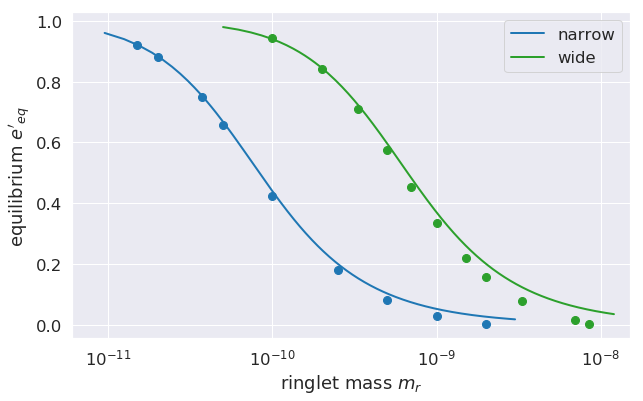

In [7]:
#plot de_eq vs total_ring_masses
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
ring_widths = df.ring_width.unique()
total_ring_mass_ranges = [np.linspace(9.5e-12, 3.0e-9, 1001), np.linspace(5.0e-11, 1.2e-8, 1001)]
for idx, ring_width in enumerate(ring_widths):
    jdx = (df.ring_width == ring_width)
    dfs = df[jdx]
    x = dfs.total_ring_mass
    y = dfs.e_prime
    color = color_seq[idx]
    if (idx ==1):
        color = color_seq[idx + 1]
    p = ax.plot(x, y, marker='o', markersize=8, linestyle='none', linewidth=2, label='', color=color)
    #compute BGT's e_prime
    J2 = dfs.J2.values[0]
    Rp = dfs.Rp.values[0]
    a = dfs.a.values[0]
    e = dfs.e.values[0]
    da = dfs.da.values[0]
    e_prime = dfs.e_prime.values[0]
    M_central = 1
    total_ring_masses = total_ring_mass_ranges[idx]
    e_prime_bgts = []
    for total_ring_mass in total_ring_masses:
        args = (e, J2, M_central, total_ring_mass, Rp, a, da)
        e_prime_bgt = fsolve(e_prime_eqn, e_prime, args=args)
        e_prime_bgts += [e_prime_bgt[0]]
    x = total_ring_masses
    y = np.array(e_prime_bgts)
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=ring_width, color=color)
p = ax.set_xlabel(r"ringlet mass $m_r$")
p = ax.set_ylabel(r"equilibrium $e'_{eq}$")
p = ax.set_xlim(6.0e-12, 1.5e-8)
p = ax.set_xscale('log')
p = plt.legend()
plt.savefig('figs/equilibrium.pdf', bbox_inches='tight')